In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
Titanic_train=pd.read_csv("0000000000002429_training_titanic_x_y_train.csv")

In [120]:
Titanic_test=pd.read_csv("0000000000002429_test_titanic_x_test.csv")

In [121]:
Titanic_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
5,3,"Lemberopolous, Mr. Peter L",male,34.50,0,0,2683,6.4375,NaN,C,0
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1
7,3,"Jonkoff, Mr. Lalio",male,23.00,0,0,349204,7.8958,NaN,S,0
8,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
9,3,"Rouse, Mr. Richard Henry",male,50.00,0,0,A/5 3594,8.0500,NaN,S,0


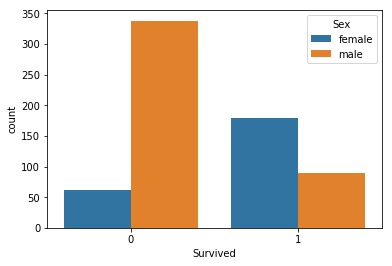

In [122]:
sns.countplot(x='Survived',hue='Sex',data=Titanic_train)

In [123]:
Titanic_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [124]:
def mean_age(cols):
    Age=cols[0]
    pclass=cols[1]
    if pd.isnull(Age):
        if pclass==1:
            return 17
        if pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [125]:
Titanic_train['Age']=Titanic_train[['Age','Pclass']].apply(mean_age,axis=1)

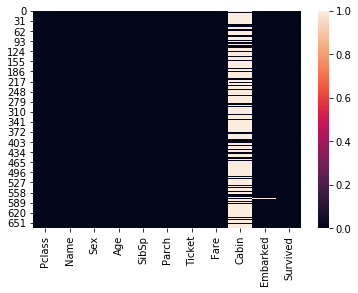

In [126]:
sns.heatmap(Titanic_train.isnull())

In [127]:
sex=pd.get_dummies(Titanic_train['Sex'],drop_first=True)

In [128]:
embark=pd.get_dummies(Titanic_train['Embarked'],drop_first=True)

In [129]:
train=pd.concat([Titanic_train,sex,embark],axis=1)

In [130]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [131]:
x=train.drop('Survived',axis=1)

In [132]:
y=train['Survived']

In [133]:
Titanic_test['Age']=Titanic_test[['Age','Pclass']].apply(mean_age,axis=1)

In [134]:
sex1=pd.get_dummies(Titanic_test['Sex'],drop_first=True)

In [135]:
embark1=pd.get_dummies(Titanic_test['Embarked'],drop_first=True)

In [136]:
test=pd.concat([Titanic_test,sex1,embark1],axis=1)

In [137]:
test.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler=StandardScaler()

In [140]:
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,8.00,1,1,36.7500,1,0,1
1,1,49.00,0,0,25.9292,0,0,1
2,3,24.00,0,0,7.7375,1,1,0
3,2,24.00,2,1,27.0000,0,0,1
4,1,36.00,0,0,26.2875,1,0,1
5,1,71.00,0,0,49.5042,1,0,0
6,3,16.00,0,0,9.5000,1,0,1
7,3,24.00,0,0,7.7250,1,1,0
8,3,18.00,0,0,7.7750,0,0,1
9,3,24.00,0,0,8.6625,1,0,1


In [141]:
x_train_scaled=scaler.fit_transform(x)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [142]:
x_test_scaled=scaler.transform(test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [143]:
clf=LogisticRegression()

In [144]:
clf.fit(x_train_scaled,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
yp=clf.predict(x_test_scaled)

In [154]:
df=pd.DataFrame(yp)

In [155]:
df.to_csv("Solution.csv",index=False,encoding='utf-8',header=None)

In [156]:
df

,0
0,0
1,1
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0
